# **Linear Regression**

**y = b0 + b1*x** -> linear regression'ın matematiksel formülüdür.

**y -> bağımlı değişken**

**x-> bağımsız değişken**

Bağımsız değişken ile bağımlı değişken tahmin edilmeye çalışılır.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable    
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

Linear regression'da araba fiyatları ve arabaların satılma sayıları feature olarak kullanılacaktır.

Arabanın fiyatı arttıkça satışı azalıcaktır. Bu durumda iki feature arasında negatif yönlü bir corelation vardır.

Bağımsız değişken araba fiyatları, bağımlı değişken arabaların satılma sayılarıdır.

Amaç bu iki feature arasındaki en iyi line'ı bulmaktır.

Bu line ile araba fiyatına göre araba satılma sayıları predict edilebilir.

In [ ]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np.shape

(7,)

Pytorch kütüphanesinin car_price feature'nın bir sütundan oluştuğunu anlaması için reshape yapılır, reshape yapıldıktan sonra numpy array'den pytorch tensor'a çevrilir.

In [ ]:
car_price_tensor = Variable(torch.from_numpy(car_price_np))
car_price_tensor

tensor([3., 4., 5., 6., 7., 8., 9.])

In [87]:
#car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

Araba satışlarının tutulduğu feature da listeden array'e çevrilip reshape yapılıp, array'den tensor'e çevrilir.

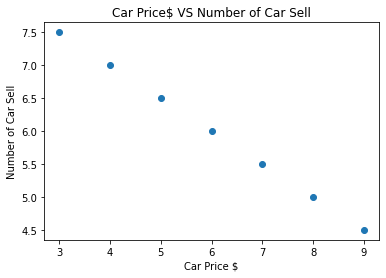

In [88]:
#visualizing
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

Pytorch'ta oluşturulacak linear regression modelinde şu adımlar izlenecektir;

*   Linear regression class'ı yaratılmalıdır.
*   Linear regression modeli class'ın içerisine define edilecektir.
*   Linear regression'daki parametreleri eğitebilmek için bir error değerine sahip olmak gerekir. Bu error MSE (Mean Squared Error) yöntemi ile hesaplanır.
*   Oluşan error değerine göre parametrelerin optimize edilmesi gerekir. Optimize algoritması olarak SGD (Stochastic Gradient Descent) yöntemi kullanılacaktır.
*   Backward propagation ile parametreler güncellenir.
*   Forward ve backward propagation işlemi adım sayısı belirlenerek bir for döngüsünde yapılır. For döngüsü yapılmazsa parametrelerin adım sayısı kadar tek tek güncellenmesi gerekir.
*   Bulunan en uygun parametrelerle line predict edilir.






**b0(constant)(bias)** = Line'ın y eksenini kestiği yer ve regresyon sabitidir.

**b1(coefficient)** = Line'ın eğimi veya regresyon katsayısıdır.

In [89]:
#create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size): #linear regression modelinde input size ve output size bilinmelidir.
        super(LinearRegression,self).__init__() #neural network modülünden Linear Regression parametreleri inherit edilir.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x) #linear regression modeli x adında bir input parametresi alır ve y -> output döndürür.

In [90]:
#define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) #y = b0 + b1*x

y = b0 + b1*x linear regression formülünde x ve y skaler değerlerdir. Bu yüzden dimension'ları 1'dir.

In [91]:
# MSE
mse = nn.MSELoss()

In [92]:
# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

b0 ve b1 değerlerini güncellemek için Stochastic Gradient Descent yöntemi kullanılmıştır.

In [93]:
# train model
loss_list = []
iteration_number = 700
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() #b0 ve b1 parametreleri başlangıçta 0 olarak verilir.
    
    # Forward to get output
    results = model(car_price_tensor) #linear regression modelinin içerisine araç fiyatları feature'ı koyulur.
                                      #result -> output -> y değeridir.
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor) #gerçek noktalar ile modelin bulduğu y değerleri arasındaki hata mse yöntemi ile bulunur.
    
    # backward propagation
    loss.backward() #türev değerleri elde edilir.
    
    #Updating parameters
    optimizer.step() #türev değerine göre b0 ve b1 parametreleri güncellenir.
    
    # store loss
    loss_list.append(loss.data) #loss değerleri boş bir listede depolanır.
    
    # print loss
    if(iteration % 50 == 0):
        print('Epoch: {} -----> loss: {}'.format(iteration, loss_list))

Epoch: 0 -----> loss: 9.9787015914917
Epoch: 50 -----> loss: 4.78549337387085
Epoch: 100 -----> loss: 3.2337582111358643
Epoch: 150 -----> loss: 2.1851868629455566
Epoch: 200 -----> loss: 1.4766223430633545
Epoch: 250 -----> loss: 0.9978145360946655
Epoch: 300 -----> loss: 0.6742649674415588
Epoch: 350 -----> loss: 0.4556291699409485
Epoch: 400 -----> loss: 0.30788758397102356
Epoch: 450 -----> loss: 0.20805253088474274
Epoch: 500 -----> loss: 0.14058996737003326
Epoch: 550 -----> loss: 0.09500249475240707
Epoch: 600 -----> loss: 0.06419753283262253
Epoch: 650 -----> loss: 0.043380651623010635


İlk adımda loss değeri çok yüksektir, backward propagation ile parametreler güncellendikçe giderek azalır.

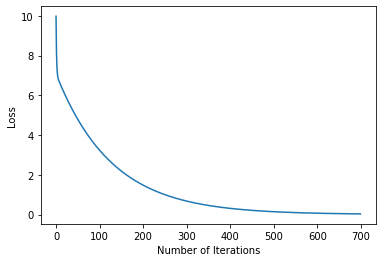

In [94]:
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

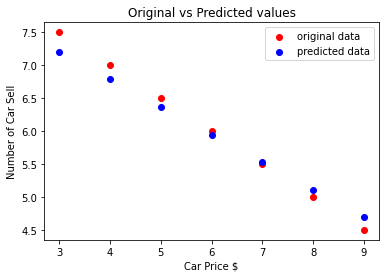

In [95]:
predicted = model(car_price_tensor).data.numpy() #güncellenen parametreler ile prediction yapılır.
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

Orijinal data ile predicted data'nın neredeyse tam doğru olarak tahmin edildiği görülür.